In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
from sklearn.preprocessing import MultiLabelBinarizer
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PrathameshR10/Assignments/main/Folder/anime.csv')

In [3]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
df.nunique()

anime_id    12294
name        12292
genre        3264
type            6
episodes      187
rating        598
members      6706
dtype: int64

#### Duplicate Values

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


#### Missing Values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [9]:
df.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [10]:
df['genre'].fillna(df['genre'].mode()[0],inplace=True)
df['type'].fillna(df['type'].mode()[0],inplace=True)

In [11]:
df['rating'].nunique()

598

In [12]:
df['rating'].fillna(df['rating'].median(),inplace=True)

In [13]:
df.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

<Axes: xlabel='type', ylabel='count'>

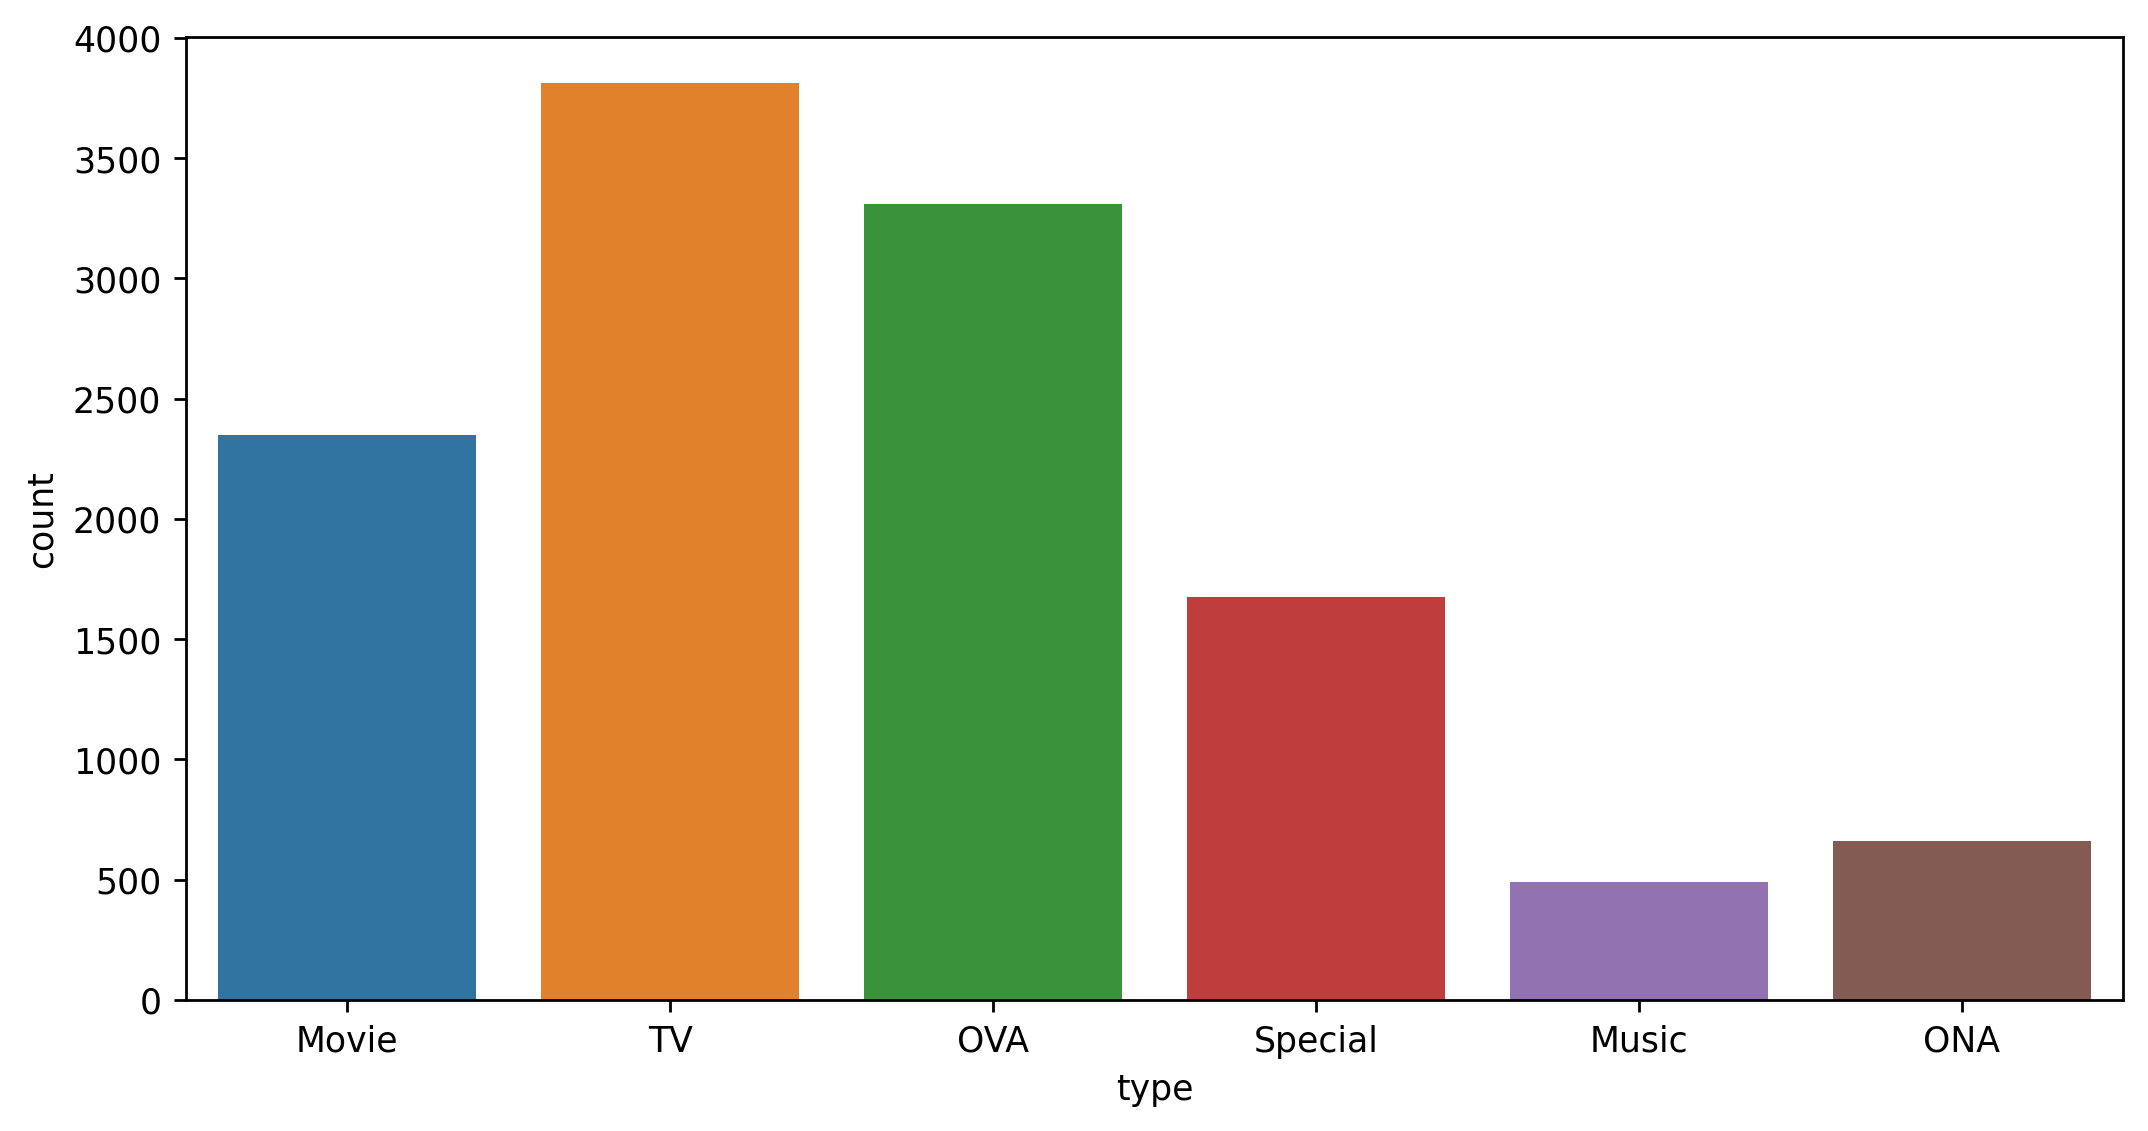

In [14]:
sns.countplot(x = df['type'])

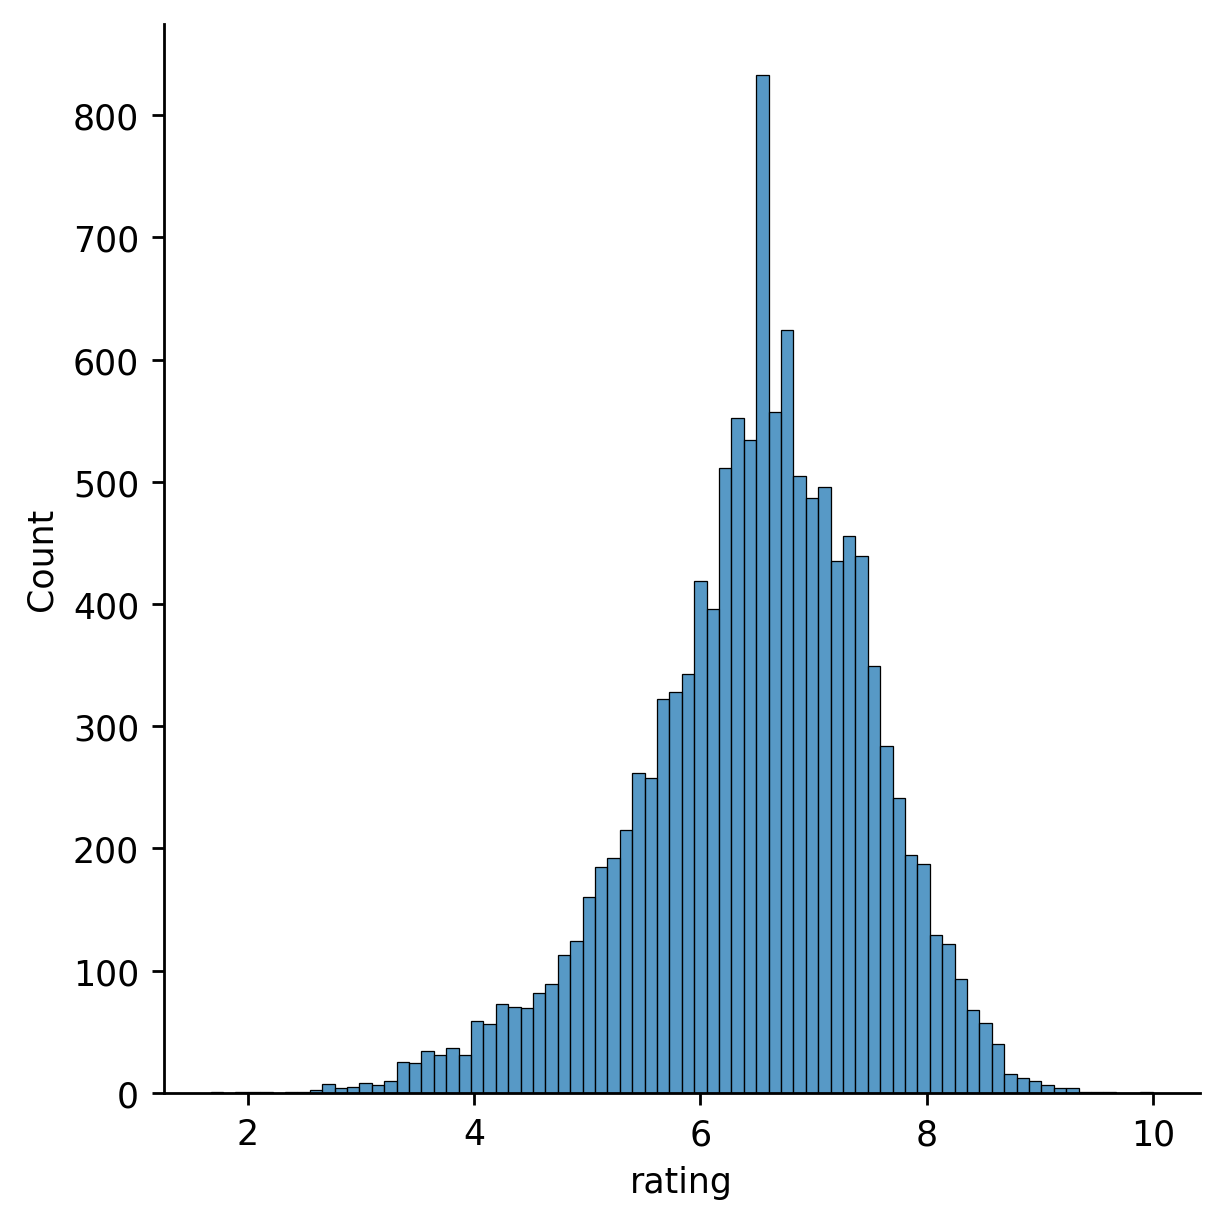

In [15]:
sns.displot(df['rating'])

In [16]:
# Features we will be using for computing similarity are genres,name & ratings columns
# So we will drop other irrelevant columns from our dataset for simplicity.

In [17]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [18]:
df.drop(columns=['anime_id','type', 'episodes', 'members'],inplace=True)

In [19]:
df

,name,genre,rating
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",9.37
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",9.26
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",9.25
3,Steins;Gate,"Sci-Fi, Thriller",9.17
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",9.16
...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,4.15
12290,Under World,Hentai,4.28
12291,Violence Gekiga David no Hoshi,Hentai,4.88
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,4.98


In [20]:
df['genre'] = df['genre'].apply(lambda x: x.split(', ') if x else [])

In [21]:
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['genre'])

In [22]:
df

,name,genre,rating
0,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",9.37
1,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",9.26
2,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",9.25
3,Steins;Gate,"[Sci-Fi, Thriller]",9.17
4,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",9.16
...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,[Hentai],4.15
12290,Under World,[Hentai],4.28
12291,Violence Gekiga David no Hoshi,[Hentai],4.88
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,[Hentai],4.98


In [23]:
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=df.index)

In [24]:
df = pd.concat([df, genre_df], axis=1)

In [25]:
df

,name,genre,rating,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",9.37,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",9.26,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",9.25,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Steins;Gate,"[Sci-Fi, Thriller]",9.17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",9.16,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,[Hentai],4.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,Under World,[Hentai],4.28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,Violence Gekiga David no Hoshi,[Hentai],4.88,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,[Hentai],4.98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df.drop(columns='genre',inplace=True)

In [27]:
df

,name,rating,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,Kimi no Na wa.,9.37,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,Fullmetal Alchemist: Brotherhood,9.26,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Gintama°,9.25,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Steins;Gate,9.17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Gintama&#039;,9.16,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,4.15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,Under World,4.28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,Violence Gekiga David no Hoshi,4.88,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,4.98,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Normalizing data

In [28]:
from sklearn.preprocessing  import MinMaxScaler
sc = MinMaxScaler()

In [29]:
df['rating'] = sc.fit_transform(df[['rating']])

In [30]:
df

,name,rating,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,Kimi no Na wa.,0.924370,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,Fullmetal Alchemist: Brotherhood,0.911164,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Gintama°,0.909964,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Steins;Gate,0.900360,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Gintama&#039;,0.899160,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,0.297719,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,Under World,0.313325,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,Violence Gekiga David no Hoshi,0.385354,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,0.397359,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
features = genre_df.columns.tolist() + ['rating']

### Checking for Similarity & Recommendation System

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
cosine_sim = cosine_similarity(df[features])

In [34]:
def get_recommendations(title):
    idx = df.index[df['name'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  
    anime_indices = [i[0] for i in sim_scores]
    return df['name'].iloc[anime_indices]

In [35]:
get_recommendations('Naruto')

615                                    Naruto: Shippuuden
1103    Boruto: Naruto the Movie - Naruto ga Hokage ni...
486                              Boruto: Naruto the Movie
1343                                          Naruto x UT
1472          Naruto: Shippuuden Movie 4 - The Lost Tower
1573    Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...
2458                 Naruto Shippuuden: Sunny Side Battle
2997    Naruto Soyokazeden Movie: Naruto to Mashin to ...
175                                Katekyo Hitman Reborn!
7628                              Kyutai Panic Adventure!
Name: name, dtype: object

### Evaluation

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [37]:
x_train,x_test  = train_test_split(df,test_size=0.2,random_state=42)

In [38]:
recommendations = {}
for anime in x_test['name']:
    recommendations[anime] = get_recommendations(anime)

In [39]:
def evaluate_recommendations(x_test, recommendations, genre_df):
    original_genre = []
    pred_genre = []
    
    for anime in x_test['name']:
        index_val = df[df['name'] == anime].index[0]
        original_genre.append(genre_df.loc[index_val].values)
        recommended_index = df[df['name'].isin(recommendations[anime])].index
        recommended_genre = genre_df.loc[recommended_index].sum(axis=0).values
        pred_genre.append((recommended_genre > 0).astype(int))
    
     # this loop goes through each anime in the test set, 
     # finds its index and retrieves its original genres, 
     # gets the indices of the recommended anime, 
     # converts the output in binary form and sums their values
     # and then appends the binary version of this predicted vector to a list.
    
    original_genre = np.array(original_genre)
    pred_genre = np.array(pred_genre)
    
    precision = precision_score(original_genre, pred_genre, average='macro', zero_division=0)
    recall = recall_score(original_genre, pred_genre, average='macro', zero_division=0)
    f1 = f1_score(original_genre, pred_genre, average='macro', zero_division=0)
    
    return precision, recall, f1

In [40]:
precision, recall, f1 = evaluate_recommendations(x_test, recommendations, genre_df)

In [41]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.6687746081139699
Recall: 0.98165820317954
F1 Score: 0.7912452591903566


#### Analysis of the model

In [42]:
# Precision:
    # Precision is around 66.9%.This indicates that while many of the recommended anime are relevant, 
    # there's still a significant portion that might not match user preferences closely.

# Recall:
    # Recall is on the higher end at 98.2%. 
    # This suggests that the system is good in covering the relevant genres.

    
# F1 Score:

    # The F1 Score, which is a harmonic mean of precision and recall, is 79.1%. 
    # This value indicates a balance between precision and recall but leans towards a higher recall.

#### Areas of Improvement

In [43]:
# Improving Precision:

    # Since precision is lower than recall, work can be done more on improving precision. 
    # This can be done by adding more features, or incorporating additional data.
    
# Hybrid Recommendation Approach:

    # Combine content-based filtering with collaborative filtering (user-based or item-based).
    # This can help in capturing user preferences more effectively and improving the relevance of recommendations.